Nathan Moore
Physics, Winona State University

This file shows a possible procedure for:
1. Reading data in from a "comma separated value", "csv" file
2. Plotting the data with the matplotlib library
3. Creating a "by-hand" fitline to describe the data.
4. Using scipy.optimize.curve_fit to find the equation of best fit.

The included sienna.csv file contains price, mileage, and year information from internet ads for Toyota Sienna minivans.  For typical data, see https://rmn.craigslist.org/search/cta?query=Sienna&auto_make_model=Sienna&min_auto_year=2006&max_auto_miles=175000

In [2]:
# Using a comma-separated-values (CSV) library
import csv

In [3]:
# the data will be stored in lists
price=[]
model_year=[]
mileage=[]
# read from the data file
with open("sienna.csv") as csvfile:
    datafile=csv.reader(csvfile)
    # read in information, line by line
    for row in datafile:
        # within each row, add elements to the appropariate list
        price.append(row[1])
        model_year.append(row[2])
        mileage.append(row[3])

In [4]:
# the first few rows are text labels.  Need to remove these lines 
# with a slice.  x[2:] is the list x, starting with the 3rd element
print("before: ",price)
price=price[2:]
print("after: ",price)
model_year=model_year[2:]
mileage=mileage[2:]


before:  ['price', '(USD)', '30900', '29500', '28200', '28100', '27000', '25790', '24400', '23250', '21890', '20900', '16000', '13600', '12500', '11900', '9500', '8775', '7500', '7500', '6900', '6800', '6500', '5600', '4600', '4450']
after:  ['30900', '29500', '28200', '28100', '27000', '25790', '24400', '23250', '21890', '20900', '16000', '13600', '12500', '11900', '9500', '8775', '7500', '7500', '6900', '6800', '6500', '5600', '4600', '4450']


In [5]:
# also, note that the numbers are read in as text strings
# the following commands cast them into integer format
print(price[0],model_year[0],mileage[0])
price = [ int(x) for x in price ]
model_year = [ int(x) for x in model_year]
mileage = [ float(x) for x in mileage ]
print(price[0],model_year[0],mileage[0])


30900 2017 0
30900 2017 0.0


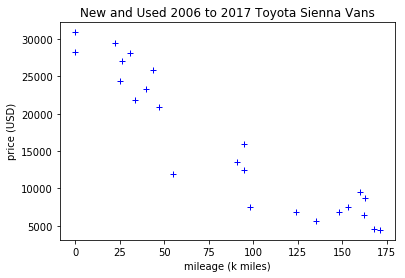

In [6]:
import matplotlib.pyplot as plt
plt.plot(mileage,price,"b+")
plt.ylabel("price (USD)")
plt.xlabel("mileage (k miles)")
plt.title("New and Used 2006 to 2017 Toyota Sienna Vans")
plt.show()

using intercept =  32000 (USD)
using slope =  -165.71428571428572 ($/kmile)


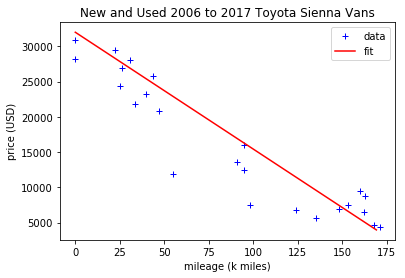

In [7]:
# fitting via trial and error
# fit parameters:
intercept=32000
slope=-29000/175
print("using intercept = ",intercept,"(USD)")
print("using slope = ",slope,"($/kmile)")
fit_mileage=[]
fit_price=[]
# the following list of points will be a plot of the fitline
for i in range(30):
    m=i*(175/30)
    p=slope*m+intercept
    
    fit_mileage.append(m)
    fit_price.append(p)
    
import matplotlib.pyplot as plt
plt.plot(mileage,price,"b+",label="data")
plt.plot(fit_mileage,fit_price,"r-",label="fit")
plt.ylabel("price (USD)")
plt.xlabel("mileage (k miles)")
plt.legend()
plt.title("New and Used 2006 to 2017 Toyota Sienna Vans")
plt.show()

Python also contains functions that will find a trendline (in the same way excel does).  I'm following the tutorial online, here: 
http://www2.mpia-hd.mpg.de/~robitaille/PY4SCI_SS_2014/_static/15.%20Fitting%20models%20to%20data.html

In [8]:
# import a curve-fitting library
from scipy.optimize import curve_fit

In [9]:
# define a function that I think describes the data
def line(x,a,b):
    return a*x + b
# note, "b" will the the y-intercept (in US dollars)
# and "a" will be the slope (in dollars/k-miles)

In [10]:
# this is the language from the example
popt,pcov=curve_fit(line,mileage,price)

In [11]:
#popt is the coefficients for the model
print(popt)

[  -145.98942722  28613.95561742]


using intercept =  28613.9556174 (USD)
using slope =  -145.989427222 ($/kmile)


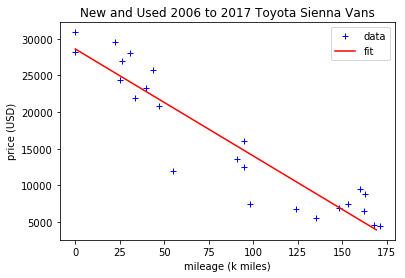

In [12]:
# now, pick out the fit values and plot the fit
slope=popt[0]
intercept=popt[1]

print("using intercept = ",intercept,"(USD)")
print("using slope = ",slope,"($/kmile)")
fit_mileage=[]
fit_price=[]
# the following list of points will be a plot of the fitline
for i in range(30):
    m=i*(175/30)
    p=slope*m+intercept
    
    fit_mileage.append(m)
    fit_price.append(p)
    
import matplotlib.pyplot as plt
plt.plot(mileage,price,"b+",label="data")
plt.plot(fit_mileage,fit_price,"r-",label="fit")
plt.ylabel("price (USD)")
plt.xlabel("mileage (k miles)")
plt.legend()
plt.title("New and Used 2006 to 2017 Toyota Sienna Vans")
plt.show()